# Vector Similarity Explained

Vector embeddings have proven to be an effective tool in a variety of fields, including natural language processing and computer vision. Comparing vector embeddings and determining their similarity is an essential part of semantic search, recommendation systems, anomaly detection, and much more.

In fact, this - comparing vector embeddings and determining their similarity - is one of the primary determining factors in how products like [Pinecone](https://www.pinecone.io/learn/vector-similarity/) and [Weaviate](https://weaviate.io/blog/distance-metrics-in-vector-search) produces its results.

## A little bit of context... what is embedding?
It's simply a numerical representation of any data. The embedding process involves capturing the semantic meaning of the input (e.g. texts) and placing similar inputs close together in the embedding space, allowing for easy comparison and analysis of the information.

The embedding model does the work of turning data into numerical representation, which takes the form of vectors.



## In Machine learning

Similarity and distance measures are fundamental tools in machine learning. Often we want to know how far apart or similar two data points are.

Some examples:

- How similar are two customers?
- How close is a search query to a webpage?
- How similar are two pictures?
- How far away is the closest restaurant?
- How we measure the distance and similarity influences the results.




The basic rule of thumb in selecting the best similarity metric for your vector database index is to match it to the one used to train your embedding model.
For example, the `all-MiniLM-L6-v2` model was trained using cosine similarity — so using cosine similarity for the index will produce the most accurate result. If you used a Euclidean distance measure to train your model, the same similarity metric should be used in the index, etc.

![similarity metric by Pinecone](https://cdn.sanity.io/images/vr8gru94/production/c50f7175a584bdf56284365106a159693e9cae69-937x429.png)



# Let's learn this through a quick example

First lets define a few distance/similarity measures. These functions calculate the distance/similarity between two vectors `x` and `y`:


In [1]:
import numpy as np
def euclidean_distance(x, y):
    """calculate euclidean distance between two arrays."""
    return np.linalg.norm(x-y)


def cos_similarity(x, y):
    """calculate cosine similarity between two arrays."""
    cos_sim = np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return cos_sim


def manhatten_distance(x, y):
    """calculate manhatten distance between two arrays."""
    manhatten_dist = np.sum(np.abs(x-y))
    return manhatten_dist

def dot_product_similarity(x, y):
    return np.dot(x, y)

Now we create pairs of random vectors with dimensionality ranging from 1 to 10000. For each dimension, we calculate the distance between the two vectors and store them in a list:



In [2]:
euclidean_distances = []
cos_distances = []
manhatten_distances = []
dot_distances = []

dims = np.linspace(1, 10000, 1000).astype(int)

for dim in dims:
    x = np.random.rand(dim)
    y = np.random.rand(dim)

    euclidean_distances.append(euclidean_distance(x, y))
    cos_distances.append(cos_similarity(x, y))
    manhatten_distances.append(manhatten_distance(x, y))
    dot_distances.append(dot_product_similarity(x, y))

This distance can be plotted in a graph:



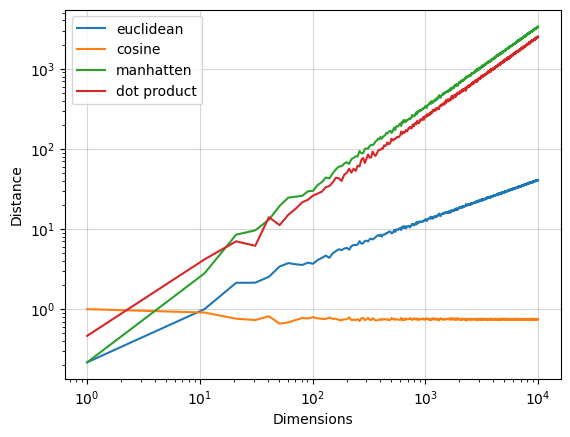

In [3]:
import matplotlib.pyplot as plt

plt.plot(dims, euclidean_distances, label='euclidean')
plt.plot(dims, cos_distances, label='cosine')
plt.plot(dims, manhatten_distances, label='manhatten')
plt.plot(dims, dot_distances, label='dot product')
plt.ylabel('Distance')
plt.xlabel('Dimensions')
plt.legend(loc='best')
plt.yscale('log')
plt.xscale('log')
plt.grid(True,alpha=0.5)
plt.show()

## Credits
- [DS lecture by @lewtun](https://github.com/lewtun/dslectures/tree/master)
- Pinecone blog: https://www.pinecone.io/learn/vector-similarity
- Weaviate blog: https://weaviate.io/blog/distance-metrics-in-vector-search